In [1]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

In [2]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dex2019_0001_attack3.pcap', prn=packet_analysis, store=0, count=100000)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [3]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(plc_cube[2][0])
dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.20')]]
normal_hmi = dst2[:,2]

dst1 = plc_cube[plc_cube[:,0]==[ip2long('192.168.1.20')]]
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.10')]]
normal_plc = dst2[:,2]

(7948, 3)
(7926, 3)
3232235836.0


In [4]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[TCP].dport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if(pkt[TCP].sport == 44818 and len(pkt[TCP].payload)>0):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

In [5]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dec2019_00000_20191206100500.pcap', prn=packet_analysis, store=0, count=100000)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [6]:
_dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
_dst2 = _dst1[_dst1[:,1]==[ip2long('192.168.1.20')]]
attack_hmi = _dst2[:,2]

_dst1 = plc_cube[plc_cube[:,0]==[ip2long('192.168.1.20')]]
_dst2 = _dst1[_dst1[:,1]==[ip2long('192.168.1.10')]]
attack_plc = _dst2[:,2]

In [7]:
print("normal HMI",normal_hmi.shape)
print("attack HMI",attack_hmi.shape)
print("normal PLC",normal_plc.shape)
print("attack PLC",attack_plc.shape)
print(max(normal_hmi)-min(normal_hmi))

normal HMI (994,)
attack HMI (1009,)
normal PLC (991,)
attack PLC (1006,)
4.076936960220337


In [8]:
normal_hmi_diff = np.diff(normal_hmi)
normal_plc_diff = np.diff(normal_plc)
attack_hmi_diff = np.diff(attack_hmi)
attack_plc_diff = np.diff(attack_plc)

1.0000000000000004
1.0
normal peaks [0.2416256  0.13066467 0.04862292 0.01756767 0.00263733]
normal valleys [0.04983919 0.01696043 0.00617362 0.00168692 0.0003703 ]
attack peaks [0.25900145 0.13056804 0.05027618 0.01755354 0.0023261  0.00211275]
attack valleys [4.80111012e-02 1.90077604e-02 5.50146207e-03 1.47724184e-03
 1.66975112e-03 5.43995388e-04 1.09784747e-05]
relative [0.93291215 1.00074008 0.96711649]
relative [1.03807628 0.89228993 1.1221788 ]


(-0.02, 0.3)

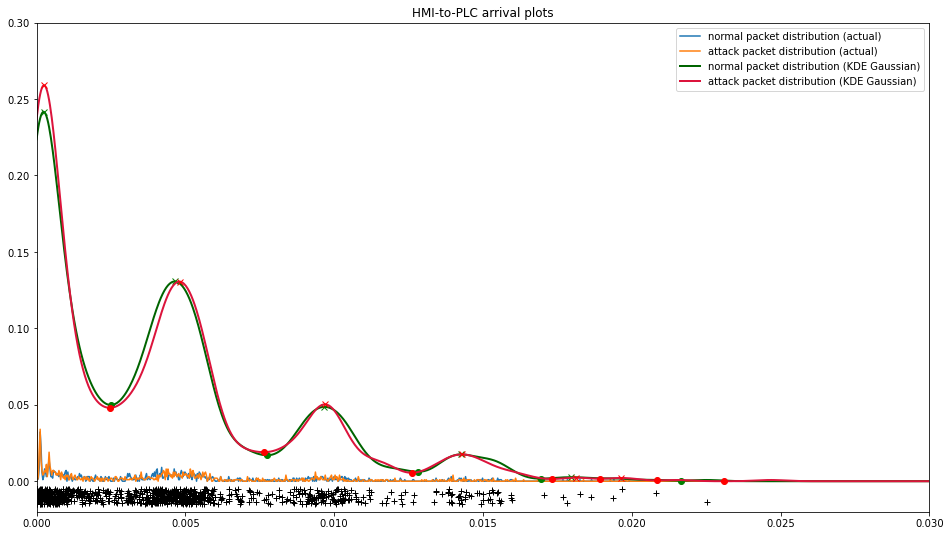

In [20]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.03
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = normal_hmi_diff[:N].reshape(-1,1)
X_beta = attack_hmi_diff[:N].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(normal_hmi_diff[:N], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
#print(true_dens)
print(np.sum(true_dens))

_hist, _bin_edges = np.histogram(attack_hmi_diff[:N], bins=N, range=(0.0,maxrange), density=True)
_bin_edges = _bin_edges[:-1]
_true_dens = _hist[:]*maxrange*(1/N)
#print(_true_dens)
print(np.sum(_true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='normal packet distribution (actual)')
ax.plot(X_plot[:, 0], _true_dens,label='attack packet distribution (actual)')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

valleys, _ = find_peaks(1-dens, height=0.001)

_kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
_log_dens = _kde.score_samples(X_plot)
_dens = np.exp(_log_dens)/1000
_peaks, __ = find_peaks(_dens, height=0.001)

_valleys, __ = find_peaks(1-_dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal packet distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
        linestyle='-', label='attack packet distribution (KDE Gaussian)')
ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
print("normal peaks",dens[peaks])
print("normal valleys",dens[valleys])
print("attack peaks",_dens[_peaks])
print("attack valleys",_dens[_valleys])
ax.title.set_text("HMI-to-PLC arrival plots")
print("relative",dens[peaks][:3]/_dens[_peaks][:3])
print("relative",dens[valleys][:3]/_dens[_valleys][:3])
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.3)


1.0000000000000007
0.9999999999999996
normal peaks [0.24279484 0.15521752 0.04697926 0.00977672 0.00519898 0.00373585
 0.00164964 0.00109278]
normal valleys [0.04795722 0.01976655 0.00441643 0.00425213 0.00268978 0.00148595
 0.00086468]
attack peaks [0.2431398  0.15573078 0.04845876 0.01002369 0.0036962 ]
attack valleys [0.04573783 0.01786755 0.00395528 0.00045299]
relative [0.9985812  0.99670419 0.96946899]
relative [1.04852412 1.10628207 1.11659105]


(-0.02, 0.3)

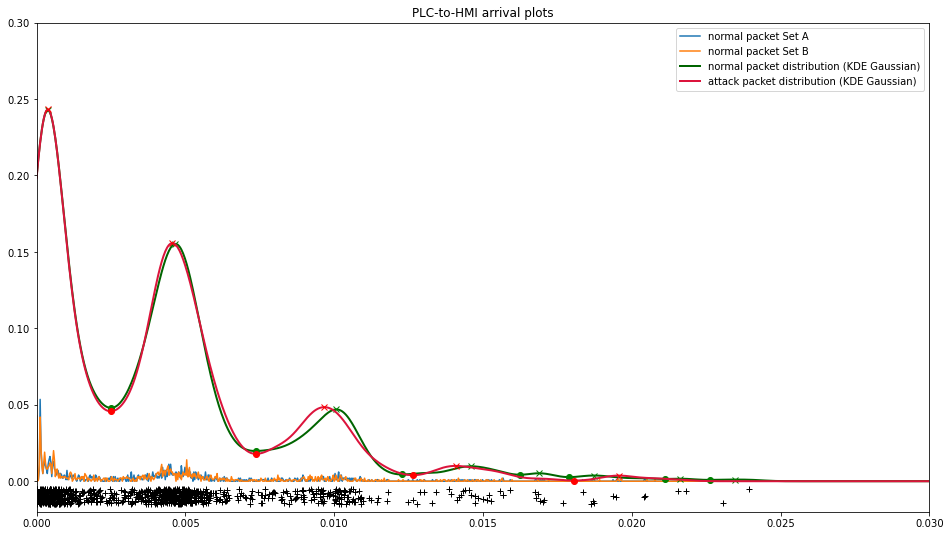

In [21]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.03
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = normal_plc_diff[:N].reshape(-1,1)
X_beta = attack_plc_diff[:N].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(normal_plc_diff[:N], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
#print(true_dens)
print(np.sum(true_dens))

_hist, _bin_edges = np.histogram(attack_plc_diff[:N], bins=N, range=(0.0,maxrange), density=True)
_bin_edges = _bin_edges[:-1]
_true_dens = _hist[:]*maxrange*(1/N)
#print(_true_dens)
print(np.sum(_true_dens))

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='normal packet Set A')
ax.plot(X_plot[:, 0], _true_dens,label='normal packet Set B')

kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

valleys, _ = find_peaks(1-dens, height=0.001)

_kde = KernelDensity(kernel='gaussian', bandwidth=0.0005).fit(X_beta)
_log_dens = _kde.score_samples(X_plot)
_dens = np.exp(_log_dens)/1000
_peaks, __ = find_peaks(_dens, height=0.001)

_valleys, __ = find_peaks(1-_dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkgreen', lw=2,
        linestyle='-', label='normal packet distribution (KDE Gaussian)')
ax.plot(X_plot[peaks],dens[peaks], "gx")
ax.plot(X_plot[valleys],dens[valleys], "go")
ax.plot(X_plot[:, 0], _dens, color='crimson', lw=2,
        linestyle='-', label='attack packet distribution (KDE Gaussian)')
ax.plot(X_plot[_peaks],_dens[_peaks], "rx")
ax.plot(X_plot[_valleys],_dens[_valleys], "ro")
print("normal peaks",dens[peaks])
print("normal valleys",dens[valleys])
print("attack peaks",_dens[_peaks])
print("attack valleys",_dens[_valleys])
print("relative",dens[peaks][:3]/_dens[_peaks][:3])
print("relative",dens[valleys][:3]/_dens[_valleys][:3])
ax.title.set_text("PLC-to-HMI arrival plots")
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.3)